In [1]:
# import pandas as pd
# #importa a base
# base = pd.read_excel('Analise_Insta.xlsx')

# #exibe cinco primeiras linhas
# base.head()


In [2]:
# base.tail()

In [3]:
# base.shape

In [4]:
# display(base)

In [5]:
# base.info()

In [7]:
# base.describe()

In [8]:
# base.groupby("Tipo")["Curtidas"].mean()

In [9]:
# base.groupby(["Tipo", "Food", "Pessoas"])[["Curtidas", "Comentários", "interações"]].mean()

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base = pd.read_excel("Analise_Insta.xlsx")

base.head()

,Tipo,Data,Curtidas,Comentários,Visualizações,Tags,Pessoas,Food,Campanhas,Carrossel,interações
0,Foto,2021-02-23,75,10,0.0,divulgacao,N,N,N,S,85
1,Foto,2021-02-27,91,10,0.0,divulgacao,N,N,N,S,101
2,Foto,2021-03-13,55,5,0.0,divulgacao,N,N,N,S,60
3,Foto,2021-03-17,50,4,0.0,divulgacao,N,N,N,N,54
4,Foto,2021-03-19,75,11,0.0,divulgacao,N,N,N,S,86


In [15]:
# Para melhorar a visualização foi criado um padrão no formato dos valores
pd.options.display.float_format = '{:.0f}'.format

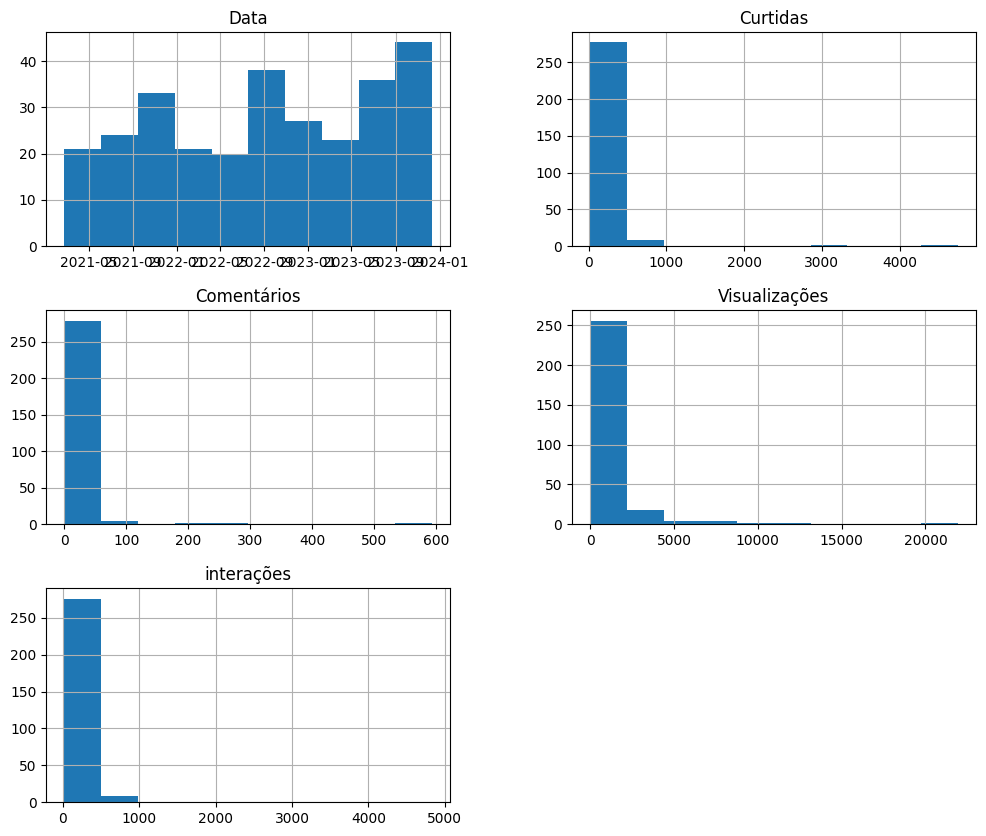

/tmp/ipykernel_75533/359397418.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = base.corr()


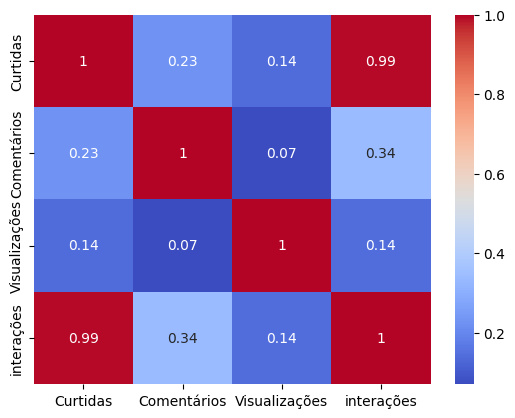

In [16]:
base.hist(figsize=(12, 10))
plt.show()

correlation_matrix = base.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [17]:
avg_likes_by_type = base.groupby('Tipo')['Curtidas'].mean()
print(avg_likes_by_type)

Tipo
Foto    147
Reels   145
Video    64
Name: Curtidas, dtype: float64


In [28]:
avg_interactions_with_people = base.groupby(['Tipo', 'Pessoas'])['interações'].mean()
avg_interactions_with_food = base. groupby(['Tipo', 'Food'])['interações'].median()
avg_interactions_with_tags = base. groupby(['Tipo', 'Tags'])['interações'].median()

print(avg_interactions_with_people)
# print(avg_interactions_with_food)

Tipo   Pessoas
Foto   N         114
       S         273
Reels  N          49
       S         176
Video  S          66
Name: interações, dtype: float64


In [31]:
mean_interactions_with_reel = base[base['Tipo'] == 'Reels'].groupby(['Pessoas', 'Food'])[['Visualizações', 'interações']].mean()
print(mean_interactions_with_reel)

              Visualizações  interações
Pessoas Food                           
N       N              1244          45
        S              1505          59
S       N              1981          99
        S              4845         235
